In [254]:
# Import the packages you wish to use here.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ikea Sales Analysis Exercise
You are a data analyst for the Webshop from IKEA. 
Your manager has asked you to analyze the company's sales over the last year and provide insights on the company's top-selling products, most profitable regions, and customer behavior.

## Data:
- **Order ID:** Unique identifier for each order
- **Date:** Date of the transaction
- **Product:** Name of the product
- **Category:** Category of the product (e.g., clothing, accessories)
- **Price:** Price of the product
- **Age**: Age of the customer
- **Provence:** Provence where the sale took place
- **Customer ID:** Unique identifier for each customer
- **Quantity:** Quantity of the product sold in the transaction

The dataset is located in the `data` folder with the name sales_data.csv


In [255]:
# Import the product_data.csv file into a DataFrame called product_data
df1 = pd.read_csv('data/ikea.csv')
product_data = pd.read_csv('data/sales_data.csv')
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150196 entries, 0 to 150195
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Order ID     150196 non-null  int64  
 1   Date         150196 non-null  object 
 2   Product      150196 non-null  object 
 3   Category     150196 non-null  object 
 4   Price        150196 non-null  float64
 5   Age          150196 non-null  int64  
 6   Customer ID  150196 non-null  int64  
 7   Quantity     150196 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 9.2+ MB


In [256]:
product_data.head(5)

,Order ID,Date,Product,Category,Price,Age,Customer ID,Quantity
0,0,2023-02-17,KALLVIKEN,Bookcases & shelving units,135.0,95,3003,7
1,0,2023-02-17,HENRIKSDAL,Chairs,70.0,95,3003,3
2,0,2023-02-17,ELVARLI,Wardrobes,437.0,95,3003,9
3,1,2022-11-18,VIKARE,Beds,95.0,82,4998,3
4,1,2022-11-18,PÅHL,Children's furniture,325.0,82,4998,1


In [257]:
product_data['Date'] = pd.to_datetime(product_data['Date'])
product_data.dtypes

Order ID                int64
Date           datetime64[ns]
Product                object
Category               object
Price                 float64
Age                     int64
Customer ID             int64
Quantity                int64
dtype: object

# Tasks 

1. Calculate the total sales revenue for the company over the last year and visualize the trend over time. You can add extra dimensions to the visualization if you wish.

In [258]:
# We add another column: the total sale amount of this row equals the amount of items sold times the single unit price
product_data['Sale amount'] = product_data["Quantity"] * product_data['Price']
task_1_reference = product_data[['Date', 'Sale amount']]
task_1_reference

,Date,Sale amount
0,2023-02-17,945.0
1,2023-02-17,210.0
2,2023-02-17,3933.0
3,2022-11-18,285.0
4,2022-11-18,325.0
...,...,...
150191,2022-04-02,22554.0
150192,2022-08-25,2513.0
150193,2022-08-25,3780.0
150194,2022-08-25,296.0


In [259]:
# Calculate the total turnover on a monthly basis
total_revenue_monthly_basis = task_1_reference.groupby(task_1_reference.Date.dt.to_period('M'))['Sale amount'].sum()
total_revenue_monthly_basis

Date
2022-02    17734739.6
2022-03    76334996.5
2022-04    71588337.1
2022-05    77630491.9
2022-06    73720856.5
2022-07    76611166.2
2022-08    72710880.3
2022-09    74117793.9
2022-10    78681038.6
2022-11    72136329.9
2022-12    74519904.0
2023-01    76404304.6
2023-02    52497756.7
Freq: M, Name: Sale amount, dtype: float64

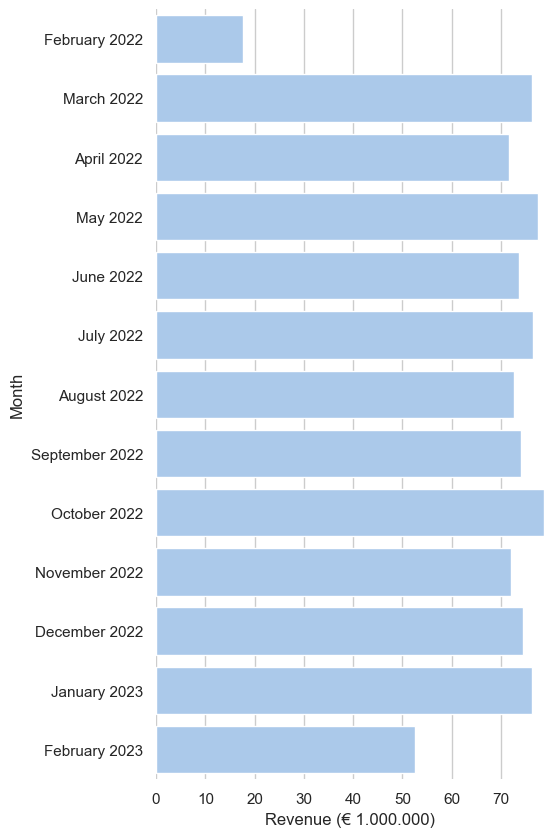

In [260]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5, 10))

labels = total_revenue_monthly_basis.index.strftime("%B %Y")
values = total_revenue_monthly_basis/1000000

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=values, y=labels, color="b")

# Add a legend and informative axis label
ax.set(xlim=(0, values.max()), ylabel="Month",
       xlabel="Revenue (€ 1.000.000)")
sns.despine(left=True, bottom=True)

In [261]:
# Calculate the total turnover by summarizing the `total_revenue_monthly_basis` series (or task_1_reference['Sale amount'].sum())
total_revenue = total_revenue_monthly_basis.sum()
total_revenue

894688595.8000001

2. Identify the top-selling products and categories, as well as their sales revenue and quantity sold.

In [262]:
task_2_reference = product_data[['Product', 'Category', 'Quantity', 'Sale amount']]
task_2_reference

,Product,Category,Quantity,Sale amount
0,KALLVIKEN,Bookcases & shelving units,7,945.0
1,HENRIKSDAL,Chairs,3,210.0
2,ELVARLI,Wardrobes,9,3933.0
3,VIKARE,Beds,3,285.0
4,PÅHL,Children's furniture,1,325.0
...,...,...,...,...
150191,PAX,Wardrobes,7,22554.0
150192,MELLTORP / ADDE,Chairs,7,2513.0
150193,SLÄKT,Beds,3,3780.0
150194,ALGOT,Bookcases & shelving units,1,296.0


In [263]:
product_metrics = task_2_reference.groupby('Product')[['Quantity', 'Sale amount']].apply(lambda product : product.sum()).reset_index()
product_metrics.rename(columns={"Quantity": "Amount sold", "Sale amount": "Sales revenue"}, inplace=True)
product_metrics

,Product,Amount sold,Sales revenue
0,ADDE,225.0,9000.0
1,ADILS,234.0,3510.0
2,AGAM,881.0,171795.0
3,AGEN,146.0,35770.0
4,ALEFJÄLL,217.0,281015.0
...,...,...,...
602,ÖNSKLIG,463.0,27317.0
603,ÖRFJÄLL,2350.0,486120.0
604,ÖSTERNÄS,1254.0,74718.0
605,ÖVRARYD,422.0,221755.0


In [264]:
most_sold_products = product_metrics.nlargest(5, 'Amount sold')
most_sold_products

,Product,Amount sold,Sales revenue
30,BESTÅ,39082.0,35150734.5
412,PAX,24930.0,70095521.0
163,GRÖNLID,18397.0,48297460.0
545,TROFAST,16356.0,3133880.0
22,BEKANT,16194.0,29843122.0


In [265]:
highest_revenue_generating_product = product_metrics.nlargest(5, 'Sales revenue')
highest_revenue_generating_product

,Product,Amount sold,Sales revenue
412,PAX,24930.0,70095521.0
163,GRÖNLID,18397.0,48297460.0
279,LIDHULT,11550.0,43881419.0
30,BESTÅ,39082.0,35150734.5
578,VIMLE,14778.0,34431325.0


In [266]:
category_metrics = task_2_reference.groupby('Category')[['Quantity', 'Sale amount']].apply(lambda category : category.sum()).reset_index()
category_metrics.rename(columns={"Quantity": "Amount sold", "Sale amount": "Sales revenue"}, inplace=True)
category_metrics

,Category,Amount sold,Sales revenue
0,Bar furniture,10671.0,7369515.0
1,Beds,46674.0,77295442.0
2,Bookcases & shelving units,121409.0,63648303.7
3,Cabinets & cupboards,65595.0,52178068.1
4,Café furniture,5932.0,3336191.0
5,Chairs,107686.0,112152269.0
6,Chests of drawers & drawer units,27837.0,16981440.0
7,Children's furniture,27707.0,7483335.0
8,Nursery furniture,21631.0,8424020.0
9,Outdoor furniture,48678.0,42635711.6


In [267]:
most_sold_category = category_metrics.nlargest(5, 'Amount sold')
most_sold_category

,Category,Amount sold,Sales revenue
14,Tables & desks,136517.0,155007311.5
2,Bookcases & shelving units,121409.0,63648303.7
5,Chairs,107686.0,112152269.0
12,Sofas & armchairs,95868.0,191973343.5
3,Cabinets & cupboards,65595.0,52178068.1


In [268]:
highest_revenue_generating_category = category_metrics.nlargest(5, 'Sales revenue')
highest_revenue_generating_category

,Category,Amount sold,Sales revenue
12,Sofas & armchairs,95868.0,191973343.5
14,Tables & desks,136517.0,155007311.5
16,Wardrobes,53127.0,114562815.0
5,Chairs,107686.0,112152269.0
1,Beds,46674.0,77295442.0


3. Determine customer behavior by analyzing the number of transactions and average transaction value

In [269]:
task_3_reference = product_data[['Customer ID', 'Order ID', 'Sale amount']]
task_3_reference

,Customer ID,Order ID,Sale amount
0,3003,0,945.0
1,3003,0,210.0
2,3003,0,3933.0
3,4998,1,285.0
4,4998,1,325.0
...,...,...,...
150191,1068,49998,22554.0
150192,4377,49999,2513.0
150193,4377,49999,3780.0
150194,4377,49999,296.0


In [270]:
transaction_metrics = task_3_reference.groupby(['Customer ID'], as_index=False).agg({'Order ID': 'count', 'Sale amount': 'sum'})
transaction_metrics.rename(columns={"Order ID": "Amount of orders", "Sale amount": "Total revenue"}, inplace=True)
transaction_metrics['average revenue per order'] = transaction_metrics['Total revenue'] / transaction_metrics['Amount of orders']
transaction_metrics

,Customer ID,Amount of orders,Total revenue,average revenue per order
0,1,40,238943.0,5973.575000
1,2,44,258124.0,5866.454545
2,3,18,66478.0,3693.222222
3,4,18,125327.0,6962.611111
4,5,39,235816.0,6046.564103
...,...,...,...,...
4995,4996,24,132098.0,5504.083333
4996,4997,25,184611.0,7384.440000
4997,4998,36,210297.0,5841.583333
4998,4999,47,280942.0,5977.489362


In [271]:
transaction_metrics[['Amount of orders', 'Total revenue', 'average revenue per order']].corr()

,Amount of orders,Total revenue,average revenue per order
Amount of orders,1.000000,0.779427,-0.019559
Total revenue,0.779427,1.000000,0.560938
average revenue per order,-0.019559,0.560938,1.000000


<Axes: >

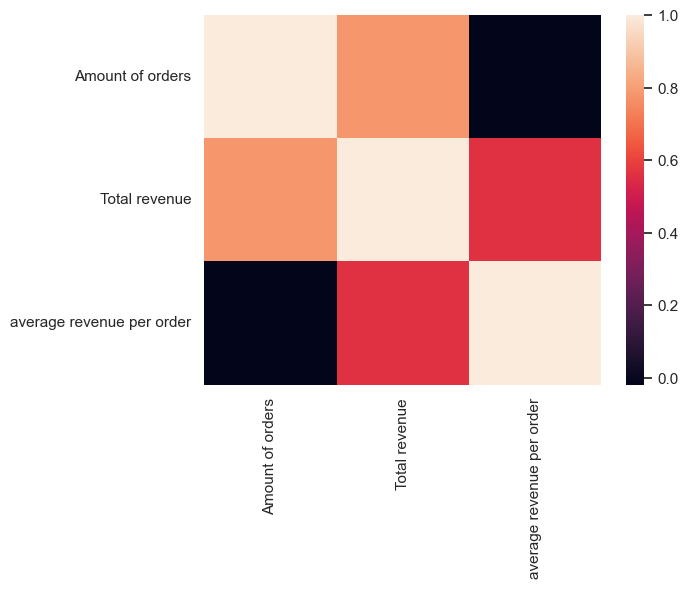

In [272]:
corr = transaction_metrics[['Amount of orders', 'Total revenue', 'average revenue per order']].corr()
sns.heatmap(corr)

The total revenue and amount of orders correlation is obvious. We can also notice there is no correlation between the mount of orders placed by a single customer and the average revenue per order. Last but not least we notice a moderate correlation between the total revenue and average.

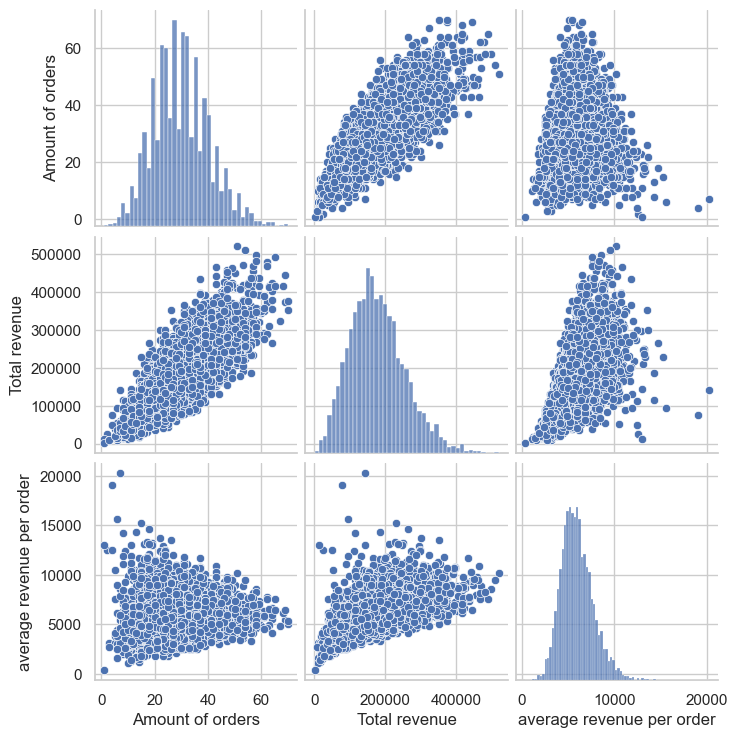

In [273]:
sns.pairplot(transaction_metrics, vars=['Amount of orders', 'Total revenue', 'average revenue per order'])

4. Calculate the 95th percentile of the total sales revenue per customer. This is the amount of money that 95% of the customers spend on average. You can additionaly display this using a normal distribution plot.

In [274]:
task_4_reference = product_data[['Customer ID', 'Sale amount']]
task_4_reference

,Customer ID,Sale amount
0,3003,945.0
1,3003,210.0
2,3003,3933.0
3,4998,285.0
4,4998,325.0
...,...,...
150191,1068,22554.0
150192,4377,2513.0
150193,4377,3780.0
150194,4377,296.0


In [275]:
revenue_by_customer = task_4_reference.groupby(['Customer ID'])['Sale amount'].sum().reset_index()
revenue_by_customer.rename(columns={"Sale amount": "Total customer revenue"}, inplace=True)
revenue_by_customer

,Customer ID,Total customer revenue
0,1,238943.0
1,2,258124.0
2,3,66478.0
3,4,125327.0
4,5,235816.0
...,...,...
4995,4996,132098.0
4996,4997,184611.0
4997,4998,210297.0
4998,4999,280942.0


In [276]:
avg_revenue_95th_percentile = revenue_by_customer.loc[revenue_by_customer['Total customer revenue'] <= revenue_by_customer['Total customer revenue'].quantile(0.95), 'Total customer revenue'].mean()
avg_revenue_95th_percentile

168960.58837894734

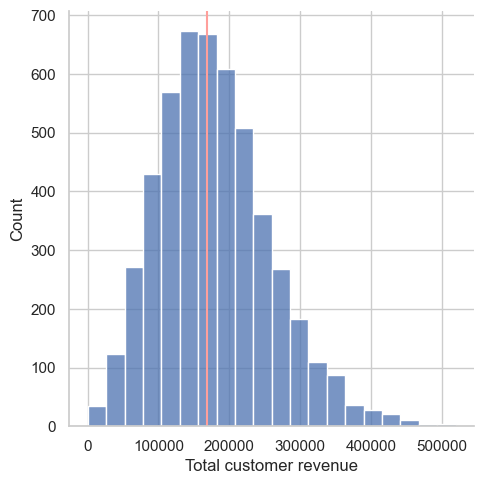

In [277]:
sns.displot(revenue_by_customer, x="Total customer revenue", bins=20)
plt.axvline(avg_revenue_95th_percentile, 0, 1000, color='r')


5. Is there a correlation between customer age and total sales revenue? If so, what is the correlation coefficient?

In [278]:
task_5_reference = product_data[['Customer ID', 'Sale amount', 'Age']]
task_5_reference

,Customer ID,Sale amount,Age
0,3003,945.0,95
1,3003,210.0,95
2,3003,3933.0,95
3,4998,285.0,82
4,4998,325.0,82
...,...,...,...
150191,1068,22554.0,13
150192,4377,2513.0,63
150193,4377,3780.0,63
150194,4377,296.0,63


In [279]:
revenue_by_customer_plus_age = task_5_reference.groupby(['Customer ID', 'Age']).sum().reset_index()
revenue_by_customer_plus_age

,Customer ID,Age,Sale amount
0,1,75,238943.0
1,2,26,258124.0
2,3,95,66478.0
3,4,76,125327.0
4,5,55,235816.0
...,...,...,...
4995,4996,36,132098.0
4996,4997,62,184611.0
4997,4998,82,210297.0
4998,4999,59,280942.0


Er lijkt me duidelijk geen correlatie te zijn tussen de leeftijd en totale revenue per customer. De data op deze pairplot geeft dit ook duidelijk aan

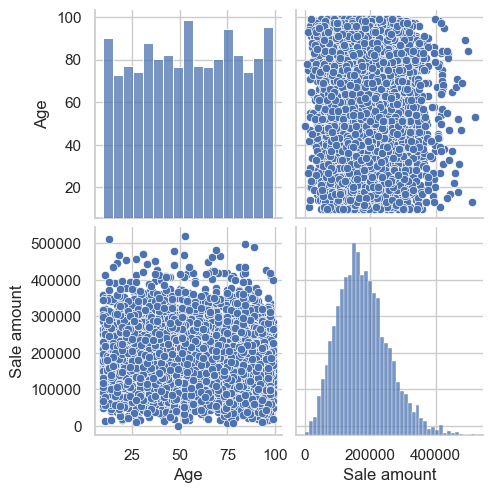

In [280]:
sns.pairplot(revenue_by_customer_plus_age, vars=["Age", "Sale amount"])


De bevestiging kan je ook hier terugvinden. De correlatiecoeff. is praktisch 0.

In [281]:
revenue_by_customer_plus_age[['Age', 'Sale amount']].corr()

,Age,Sale amount
Age,1.000000,-0.005524
Sale amount,-0.005524,1.000000
